## Análise de dados de vendas de Imóveis

### Carregando *packages*

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import seaborn as sns

### Carregando base de dados

In [2]:
df = pd.read_csv("dados_vendas_imoveis.csv")
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


### Explorando a base de dados

In [3]:
#Lista de variáveis
pd.Series(df.columns)

0                       Rua
1                    Bairro
2                    Cidade
3                  Metragem
4                   Quartos
5                 Banheiros
6                     Vagas
7                     Valor
8             Valor_anuncio
9              Tipo_anuncio
10                 Valor_mm
11                 Valor_m2
12                      rua
13                      cep
14                 latitude
15                longitude
16                    Point
17              setor_censo
18                Cod_setor
19    Cod_Grandes Regiï¿½es
20       Nome_Grande_Regiao
21                   Cod_UF
22              Nome_da_UF 
23                 Cod_meso
24             Nome_da_meso
25                Cod_micro
26            Nome_da_micro
27                   Cod_RM
28               Nome_da_RM
29            Cod_municipio
30        Nome_do_municipio
31             Cod_distrito
32         Nome_do_distrito
33          Cod_subdistrito
34      Nome_do_subdistrito
35               Cod

In [4]:
#Filtrando base de dados por variáveis de interesse
df2 = df.iloc[:, 0:12].drop(columns = ['Tipo_anuncio', 'Valor_mm'])
df2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,3040.000000
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,5400.000000
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,4500.000000


In [5]:
#Data types de cada variável
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            5605 non-null   object 
 1   Bairro         5597 non-null   object 
 2   Cidade         5605 non-null   object 
 3   Metragem       5605 non-null   int64  
 4   Quartos        5605 non-null   int64  
 5   Banheiros      5605 non-null   int64  
 6   Vagas          5605 non-null   int64  
 7   Valor          5605 non-null   object 
 8   Valor_anuncio  5605 non-null   float64
 9   Valor_m2       5605 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 438.0+ KB


In [6]:
#Número de valores únicos de cada variável
df2.nunique()

Rua              2914
Bairro            591
Cidade              1
Metragem          744
Quartos            11
Banheiros          13
Vagas              21
Valor             775
Valor_anuncio     775
Valor_m2         3508
dtype: int64

In [7]:
#Verificando missings
df2.isna().sum()

Rua              0
Bairro           8
Cidade           0
Metragem         0
Quartos          0
Banheiros        0
Vagas            0
Valor            0
Valor_anuncio    0
Valor_m2         0
dtype: int64

### Tratando missing-Descobrindo as rua sem nome de bairros

In [8]:
#Separando nome da rua do número
df2[['Logradouro', 'Numero']] = df2['Rua'].str.split(',', 1, expand = True)
df2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Valor_m2,Logradouro,Numero
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,7000.000000,Avenida Itacira,255
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,7459.677419,Rua Aurelia Perez Alvarez,42
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,3040.000000,Rua Alba Valdez,None
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,5400.000000,Rua Tobias Barreto,195
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,4500.000000,Rua Graham Bell,None


In [9]:
rua_sem_bairro = list(df2.loc[df2['Bairro'].isna(), 'Logradouro'])
rua_sem_bairro

['Rua Vergueiro',
 'Rua Alvorada do Sul',
 'Rua Professor Eduardo Monteiro',
 'Avenida Comendador Adibo Ares',
 'Rua Alvorada do Sul',
 'Rua Professor Eduardo Monteiro',
 'Rua Professor Lúcio Martins Rodrigues',
 'Rua Pacobá']

In [10]:
#Descobrindo o nome do bairro correspondente a rua
bairro_correspondente = []
for rua in rua_sem_bairro:
    bairro = df2.loc[df2['Rua'] == rua, 'Bairro'].unique()
    if len(bairro) > 0:
        bairro_correspondente.append([rua, bairro[0]])
    else:
        bairro_correspondente.append([rua, 'Sem denominação'])
#Verificando
bairro_correspondente

[['Rua Vergueiro', 'Vila Firmiano Pinto'],
 ['Rua Alvorada do Sul', 'Jardim Guedala'],
 ['Rua Professor Eduardo Monteiro', 'Jardim Leonor'],
 ['Avenida Comendador Adibo Ares', 'Morumbi'],
 ['Rua Alvorada do Sul', 'Jardim Guedala'],
 ['Rua Professor Eduardo Monteiro', 'Jardim Leonor'],
 ['Rua Professor Lúcio Martins Rodrigues', 'Sem denominação'],
 ['Rua Pacobá', 'Jardim Panorama']]

In [11]:
#Fill missings
for bairro in bairro_correspondente[1]:
    df2.loc[df2['Bairro'].isna(), 'Bairro'] = bairro
df2.isna().sum()

Rua                 0
Bairro              0
Cidade              0
Metragem            0
Quartos             0
Banheiros           0
Vagas               0
Valor               0
Valor_anuncio       0
Valor_m2            0
Logradouro          0
Numero           4427
dtype: int64

### Média da metragem de cada um dos bairros ordenada pelo número de anúncios

In [12]:
top15_metragem = (df2
                 .groupby('Bairro')
                 .agg({'Bairro': 'count', 'Metragem':'mean'})
                 .round({'Metragem': 2})
                 .rename(columns = {'Bairro': 'Nº de anúncios', 'Metragem': 'Metragem média'})
                 .sort_values(by = 'Nº de anúncios', ascending = False)
                 .head(15)
                )
top15_metragem

,Nº de anúncios,Metragem média
Bairro,,
Alto de Pinheiros,206,431.15
Jardim Guedala,176,635.11
Brooklin Paulista,143,302.43
Vila Mariana,142,234.42
Planalto Paulista,141,324.31
Pacaembu,138,500.11
Jardim Paulista,131,452.73
Vila Madalena,122,315.63
Campo Belo,98,280.32


In [13]:
def barhplot(y:str, data: pd.DataFrame, palette: str, title: str, figsize = (8, 10)):
    #Criando gradiente de cores para as barras
    cmap = plt.cm.get_cmap(palette)
    bar_colors = [mpc.to_hex(cmap(k)) for k in np.linspace(1, 0.4, len(data))]
    #Plot do gráfico de barras
    plt.figure(figsize = figsize)
    g = plt.barh(data.index, data[y], color = bar_colors)
    plt.gca().invert_yaxis()
    #Adicionando rótulos para os dados
    for bar in g.patches:
        value = bar.get_width()
        plt.text(s = f'{value}',
                 x = bar.get_x() + bar.get_width(),
                 y = bar.get_y() + bar.get_height()/2 ,
                 ha = 'right',
                 va = 'center',
                 fontweight = 'bold',
                 color = 'white')
    #Titulo
    plt.gca().set_title(f'{title}', fontweight = 'bold');
    #Removendo eixos
    for spine in ['top', 'bottom', 'left', 'right']:
        plt.gca().spines[spine].set_visible(False)
    #Removendo xticks
    plt.tick_params(axis = 'x', bottom = False, labelbottom = False)

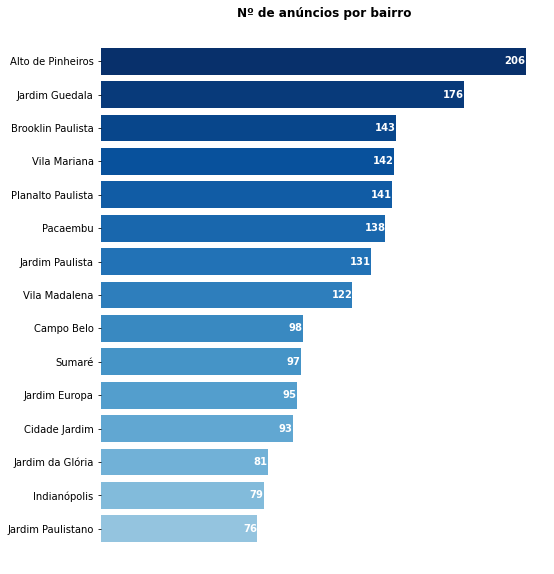

In [14]:
barhplot(y = 'Nº de anúncios', data = top15_metragem, palette = 'Blues', title = 'Nº de anúncios por bairro')

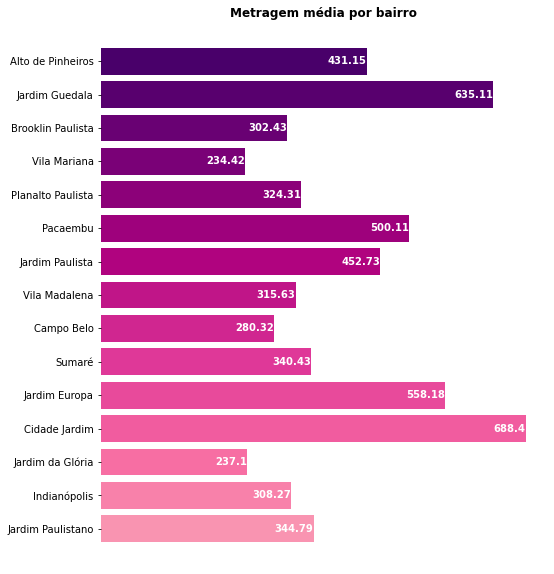

In [15]:
barhplot(y = 'Metragem média', data = top15_metragem, palette = 'RdPu', title = 'Metragem média por bairro')

### Bairros com valor de anúncio e metro quadrado mais caros 

In [16]:
bairros_mais_caros = (df2[['Bairro', 'Valor_anuncio', 'Valor_m2']]
                     .groupby('Bairro')
                     .agg('mean')
                     .round(2)
                     .sort_values(by = 'Valor_anuncio', ascending = False)
                     .head(10)
                     )
bairros_mais_caros

,Valor_anuncio,Valor_m2
Bairro,,
Jardim América,18324877.55,25102.10
Chácara Flora,13500000.00,10754.61
Retiro Morumbi,11336000.00,10309.86
Jardim Europa,10465841.05,18199.40
Jardim Luzitânia,8935961.54,16796.71
Jardins,8157142.86,11904.14
Morro dos Ingleses,8100000.00,11749.03
Jardim Paulista,6832053.44,14974.20
Cidade Jardim,6127966.67,8629.16


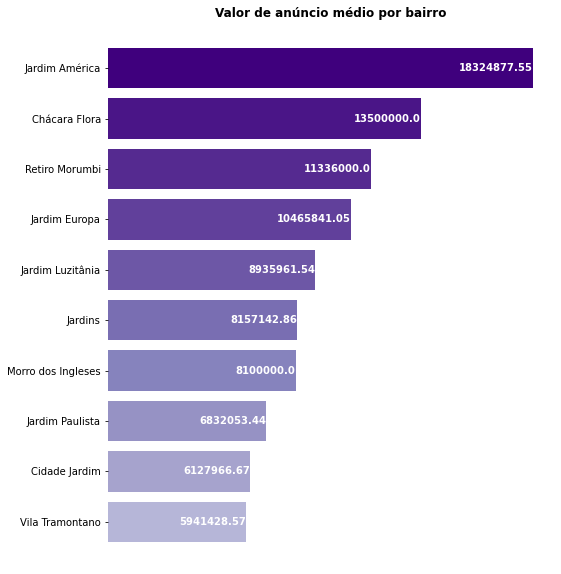

In [17]:
barhplot(y = 'Valor_anuncio', data = bairros_mais_caros, palette = 'Purples', title = 'Valor de anúncio médio por bairro')

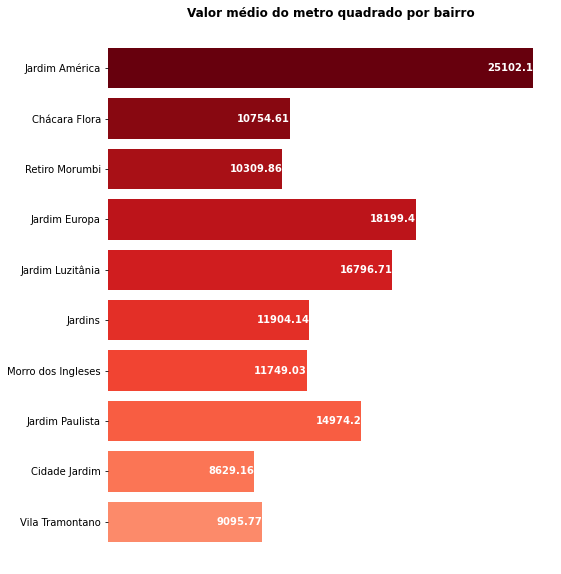

In [18]:
#winter, pink, ocean, jet
barhplot(y = 'Valor_m2', data = bairros_mais_caros, palette = 'Reds', title = 'Valor médio do metro quadrado por bairro')